# Breast Cancer Detection using Neural Networks

## 1. Project Objective
The objective of this project is to build a Deep Learning model using an Artificial Neural Network (ANN) to classify breast cancer tumors as either **Malignant** or **Benign**.

## 2. Dataset Description
We are using the Breast Cancer Wisconsin (Diagnostic) Database.
* **Features:** 30 numeric attributes (radius, texture, perimeter, area, etc.)
* **Target:** 
    * 0: Malignant
    * 1: Benign

In [1]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning Libraries
import tensorflow as tf
from tensorflow import keras

# Configuration
tf.random.set_seed(3) # For reproducibility
sns.set_style('whitegrid')
print("Libraries Imported Successfully")

Libraries Imported Successfully


In [2]:
# Load Dataset
dataset = sklearn.datasets.load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['label'] = dataset.target

# Basic Information
print(f"Dataset Shape: {df.shape}")
print("-" * 30)
print("Target Distribution:")
print(df['label'].value_counts())

Dataset Shape: (569, 31)
------------------------------
Target Distribution:
label
1    357
0    212
Name: count, dtype: int64


## 3. Exploratory Data Analysis (EDA)
Visualizing correlations between features to understand dependencies.

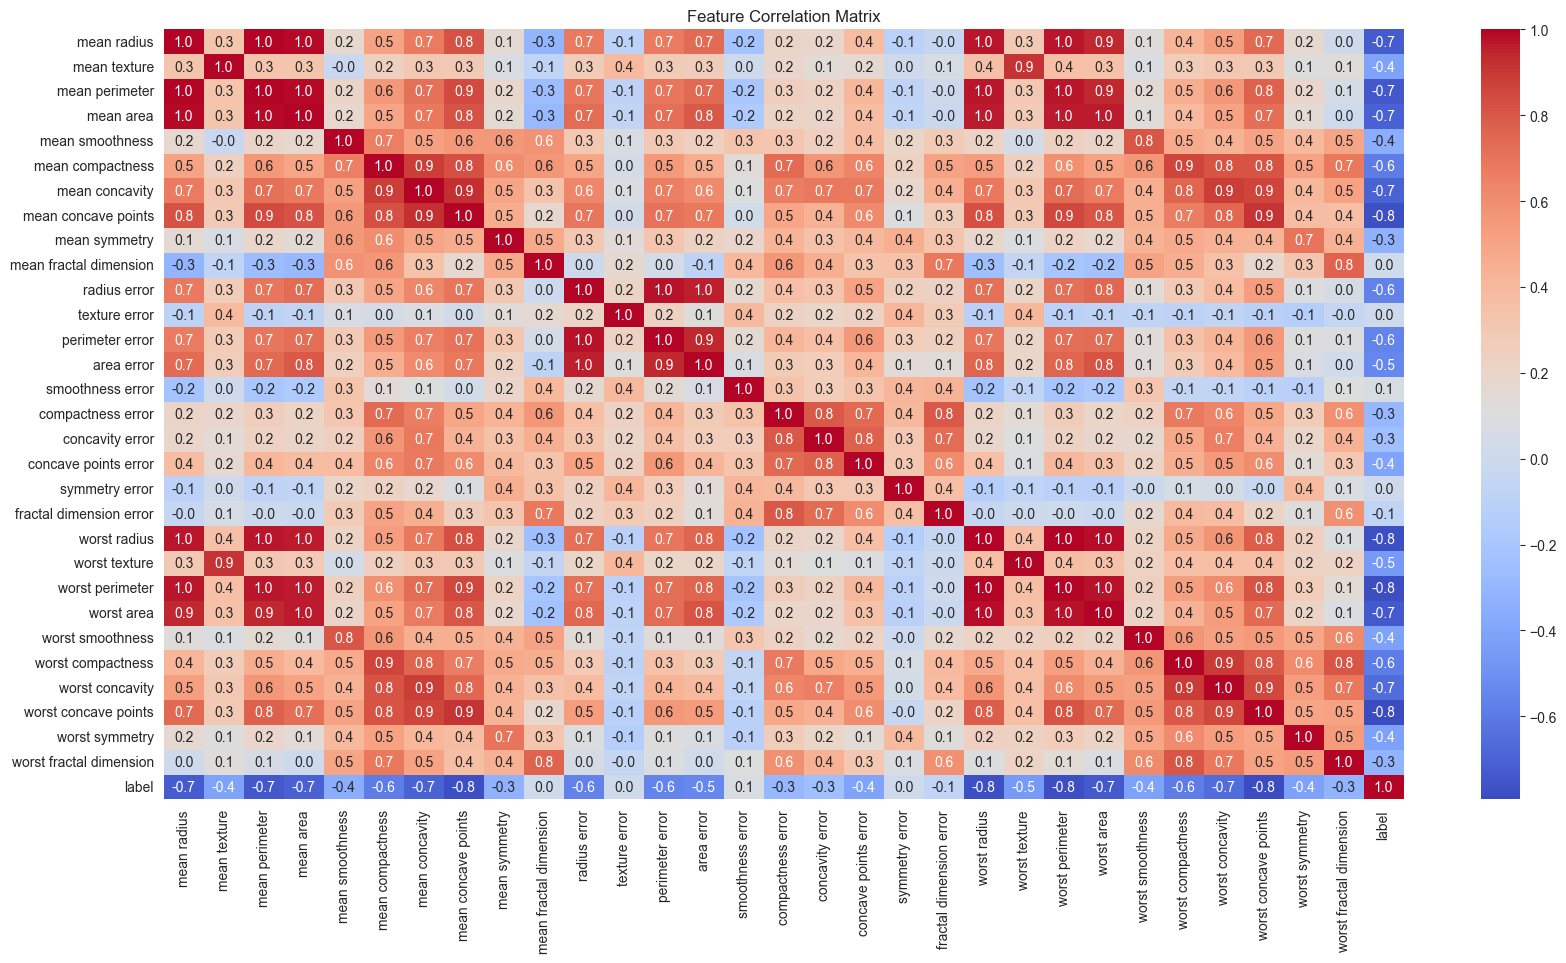

In [5]:
# Visualization: Correlation Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Feature Correlation Matrix")
plt.show()

## 4. Data Preprocessing
Splitting the data into training and testing sets, followed by standardization to ensure optimal Neural Network performance.

In [6]:
# Separating Features and Target
X = df.drop(columns='label', axis=1)
Y = df['label']

# Splitting the data (80% Train, 20% Test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Scaling the Data
# Neural Networks converge faster and better with scaled data (Mean=0, Std=1)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

print("Data Preprocessing Complete.")

Data Preprocessing Complete.


## 5. Model Architecture
Constructing a Feed-Forward Neural Network.

In [7]:
# Building the Neural Network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), # Input Layer
    keras.layers.Dense(20, activation='relu'), # Hidden Layer
    keras.layers.Dense(2, activation='sigmoid') # Output Layer (Binary Classification)
])

# Compiling the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 662
Trainable params: 662
Non-trainable params: 0
_________________________________________________________________


## 6. Training
Training the model for 10 epochs.

Epoch 1/10
13/13 [==============================] - 1s 24ms/step - loss: 0.3878 - accuracy: 0.8851 - val_loss: 0.3106 - val_accuracy: 0.8696
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.2720 - accuracy: 0.9144 - val_loss: 0.2264 - val_accuracy: 0.9783
Epoch 3/10
13/13 [==============================] - 0s 7ms/step - loss: 0.2101 - accuracy: 0.9315 - val_loss: 0.1862 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 0.1788 - accuracy: 0.9364 - val_loss: 0.1619 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1566 - accuracy: 0.9389 - val_loss: 0.1466 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1410 - accuracy: 0.9511 - val_loss: 0.1362 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 7ms/step - loss: 0.1291 - accuracy: 0.9560 - val_loss: 0.1283 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

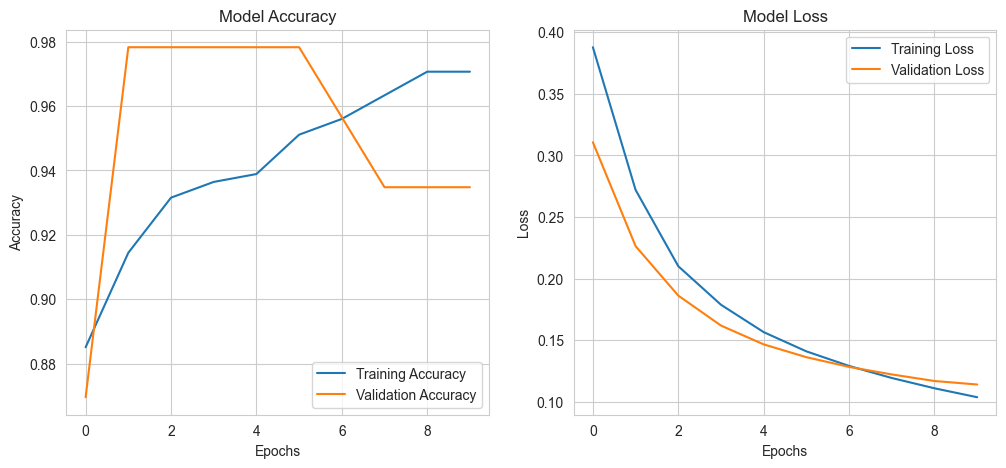

In [8]:
# Training the model
history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=10, verbose=1)

# Plotting Training History
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 7. Model Evaluation
Assessing performance on unseen test data using Accuracy, Confusion Matrix, and Classification Report.

4/4 [==============================] - 0s 8ms/step - loss: 0.0992 - accuracy: 0.9649
Test Accuracy: 0.9649
4/4 [==============================] - 0s 3ms/step


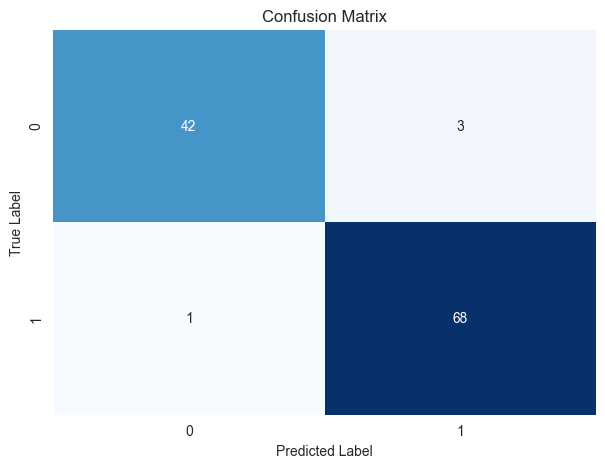

              precision    recall  f1-score   support

   Malignant       0.98      0.93      0.95        45
      Benign       0.96      0.99      0.97        69

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [9]:
# Evaluate on Test Data
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Generating Predictions
Y_pred_probs = model.predict(X_test_std)
Y_pred_labels = [np.argmax(i) for i in Y_pred_probs]

# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred_labels)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(Y_test, Y_pred_labels, target_names=['Malignant', 'Benign']))

## 8. Prediction System
Building a reusable function for real-time predictions.

In [10]:
def predict_cancer_type(input_data):
    """
    Takes a list of 30 features, scales them, and predicts the cancer type.
    """
    # Change input_data to a numpy array
    input_as_numpy = np.asarray(input_data)

    # Reshape the numpy array as we are predicting for one datapoint
    input_reshaped = input_as_numpy.reshape(1, -1)

    # Standardize the input data (Use the SAME scaler fitted on training data)
    input_std = scaler.transform(input_reshaped)

    # Prediction
    prediction = model.predict(input_std)
    prediction_label = np.argmax(prediction)

    print(f"Prediction Probabilities: {prediction}")
    
    if prediction_label == 0:
        return "The tumor is Malignant"
    else:
        return "The tumor is Benign"

# --- Testing the System ---
# Example Data (Malignant Case)
sample_input = (17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,
                1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,
                0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

result = predict_cancer_type(sample_input)
print(result)

1/1 [==============================] - 0s 31ms/step
Prediction Probabilities: [[8.8327616e-01 2.0744055e-04]]
The tumor is Malignant


C:\Users\gnan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
